In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [9]:
def analyze_acceleration_data(data_path, window_size, z_threshold):
    df = pd.read_csv(data_path)
    
    # rolling mean
    df['rolling_mean'] = df['Acceleration_mps2'].rolling(window=window_size, center=True).mean()
    df['rolling_std'] = df['Acceleration_mps2'].rolling(window=window_size, center=True).std()
    
    # Calculate z-scores
    df['z_score'] = np.abs((df['Acceleration_mps2'] - df['rolling_mean']) / df['rolling_std'])
    df['is_anomaly'] = df['z_score'] > z_threshold
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Graph 1:red dots are anomallies
    ax1.plot(df.index, df['Acceleration_mps2'], label='Raw Data', color='blue', alpha=0.6)
    ax1.scatter(df[df['is_anomaly']].index, 
               df[df['is_anomaly']]['Acceleration_mps2'],
               color='red', label='Anomalies')
    ax1.plot(df.index, df['rolling_mean'], 
            label=f'{window_size}-step Rolling Mean',
            color='green', linestyle='--')
    ax1.fill_between(df.index,
                     df['rolling_mean'] - df['rolling_std'],
                     df['rolling_mean'] + df['rolling_std'],
                     alpha=0.3, color='green',
                     label='±1 Std Dev')
    ax1.set_ylabel('Acceleration (m/s²)')
    ax1.set_title('Acceleration Data with Anomalies')
    ax1.legend()
    ax1.grid(True)
    
    # Plot 2: Z-scores
    ax2.plot(df.index, df['z_score'], label='|Z-score|', color='purple')
    ax2.axhline(y=z_threshold, color='red', linestyle='--',
                label=f'Threshold (z={z_threshold})')
    ax2.set_xlabel('Time Step')
    ax2.set_ylabel('|Z-score|')
    ax2.set_title('Absolute Z-scores')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    
    # Calculate summary statistics
    anomaly_stats = {
        'total_readings': len(df),
        'anomalies_detected': df['is_anomaly'].sum(),
        'anomaly_percentage': (df['is_anomaly'].sum() / len(df)) * 100,
        'max_acceleration': df['Acceleration_mps2'].max(),
        'min_acceleration': df['Acceleration_mps2'].min(),
        'mean_acceleration': df['Acceleration_mps2'].mean(),
        'std_acceleration': df['Acceleration_mps2'].std()
    }
    
    return df, fig, anomaly_stats


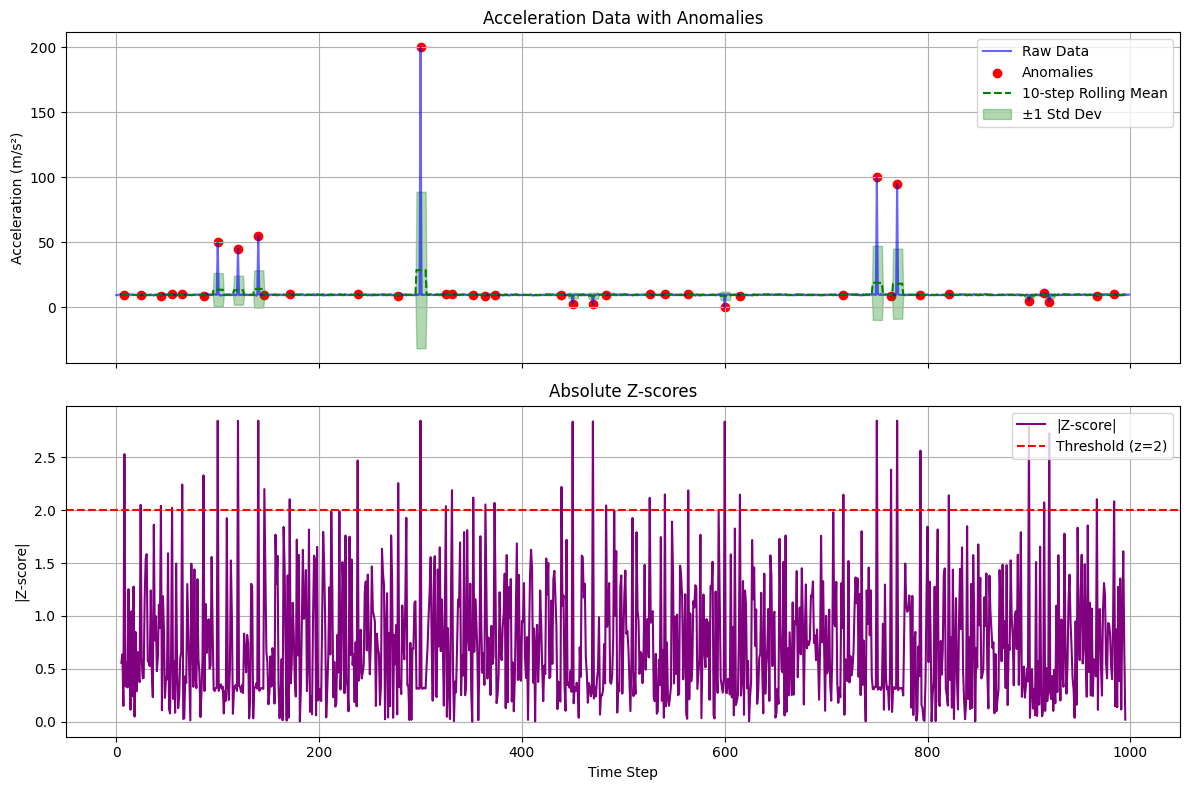

In [10]:
#my data feed to function
if __name__ == "__main__":
    data_path = "sensor-data.csv"
    results_df, visualization, stats = analyze_acceleration_data(
        data_path,
        window_size=10,
        z_threshold=2 # z means how many std is consider anomally
    )

In [11]:
    print("Analysis Summary:")
    print(f"Total readings: {stats['total_readings']}")
    print(f"Anomalies detected: {stats['anomalies_detected']}")
    print(f"Percentage of anomalies: {stats['anomaly_percentage']:.2f}%")
    print(f"Maximum acceleration: {stats['max_acceleration']:.2f} m/s²")
    print(f"Minimum acceleration: {stats['min_acceleration']:.2f} m/s²")
    print(f"Mean acceleration: {stats['mean_acceleration']:.2f} m/s²")
    print(f"Standard deviation: {stats['std_acceleration']:.2f} m/s²")

Analysis Summary:
Total readings: 1000
Anomalies detected: 39
Percentage of anomalies: 3.90%
Maximum acceleration: 200.00 m/s²
Minimum acceleration: 0.00 m/s²
Mean acceleration: 10.25 m/s²
Standard deviation: 7.53 m/s²
